In [4]:
!pip install tensorflow --default-timeout=1000

  Using cached tensorflow-2.18.0-cp310-cp310-win_amd64.whl.metadata (3.3 kB)
  Using cached tensorflow_intel-2.18.0-cp310-cp310-win_amd64.whl.metadata (4.9 kB)
  Using cached absl_py-2.1.0-py3-none-any.whl.metadata (2.3 kB)
  Using cached astunparse-1.6.3-py2.py3-none-any.whl.metadata (4.4 kB)
  Using cached flatbuffers-24.3.25-py2.py3-none-any.whl.metadata (850 bytes)
  Using cached gast-0.6.0-py3-none-any.whl.metadata (1.3 kB)
  Using cached google_pasta-0.2.0-py3-none-any.whl.metadata (814 bytes)
  Using cached libclang-18.1.1-py2.py3-none-win_amd64.whl.metadata (5.3 kB)
  Using cached opt_einsum-3.4.0-py3-none-any.whl.metadata (6.3 kB)
  Using cached protobuf-5.28.3-cp310-abi3-win_amd64.whl.metadata (592 bytes)
  Using cached termcolor-2.5.0-py3-none-any.whl.metadata (6.1 kB)
  Using cached wrapt-1.16.0-cp310-cp310-win_amd64.whl.metadata (6.8 kB)
  Using cached grpcio-1.67.1-cp310-cp310-win_amd64.whl.metadata (4.0 kB)
  Using cached tensorboard-2.18.0-py3-none-any.whl.metadata (1.6

In [7]:
!pip install matplotlib


   ---------------------------------------- 0.0/7.8 MB ? eta -:--:--
   ---------------------------------------- 0.0/7.8 MB ? eta -:--:--
   ---------------------------------------- 0.0/7.8 MB ? eta -:--:--
   ---------------------------------------- 0.0/7.8 MB ? eta -:--:--
   ---------------------------------------- 0.0/7.8 MB ? eta -:--:--
   ---------------------------------------- 0.0/7.8 MB ? eta -:--:--
   ---------------------------------------- 0.0/7.8 MB ? eta -:--:--
   ---------------------------------------- 0.0/7.8 MB ? eta -:--:--
   ---------------------------------------- 0.0/7.8 MB ? eta -:--:--
   ---------------------------------------- 0.0/7.8 MB ? eta -:--:--
   ---------------------------------------- 0.0/7.8 MB ? eta -:--:--
   ---------------------------------------- 0.0/7.8 MB ? eta -:--:--
   ---------------------------------------- 0.0/7.8 MB ? eta -:--:--
   ---------------------------------------- 0.0/7.8 MB ? eta -:--:--
   -------------------------------

In [8]:
!pip install numpy pandas  scipy scikit-learn


   ---------------------------------------- 0.0/11.6 MB ? eta -:--:--
   ---------------------------------------- 0.0/11.6 MB ? eta -:--:--
   ---------------------------------------- 0.0/11.6 MB ? eta -:--:--
   ---------------------------------------- 0.0/11.6 MB ? eta -:--:--
   ---------------------------------------- 0.0/11.6 MB ? eta -:--:--
   ---------------------------------------- 0.0/11.6 MB ? eta -:--:--
   ---------------------------------------- 0.0/11.6 MB ? eta -:--:--
    --------------------------------------- 0.3/11.6 MB ? eta -:--:--
    --------------------------------------- 0.3/11.6 MB ? eta -:--:--
    --------------------------------------- 0.3/11.6 MB ? eta -:--:--
    --------------------------------------- 0.3/11.6 MB ? eta -:--:--
    --------------------------------------- 0.3/11.6 MB ? eta -:--:--
    --------------------------------------- 0.3/11.6 MB ? eta -:--:--
    --------------------------------------- 0.3/11.6 MB ? eta -:--:--
    ----------------

In [1]:
import tensorflow as tf 
from tensorflow.keras import layers , models


In [2]:
import matplotlib.pyplot as plt

In [3]:
IMAGE_SIZE  = 256
BATCH_SIZE = 32
CHANNELS = 3


In [4]:
dataset = tf.keras.preprocessing.image_dataset_from_directory(
    "PlantVillage",
    batch_size = BATCH_SIZE,
    image_size =(IMAGE_SIZE , IMAGE_SIZE),
    shuffle=True,
)

Found 2152 files belonging to 3 classes.


In [5]:
class_names  = dataset.class_names
class_names

['Potato___Early_blight', 'Potato___Late_blight', 'Potato___healthy']

In [6]:
len(dataset)

68

So we got 68 above because in the tfdataset, every element is a batch of 32

In [7]:
68 * 32

2176

yeah, a litle more than 2152 by 20, because the last batch is not perfect

#DATA EXPLORATION

In [8]:
for image_batch, labels_batch in dataset.take(2):
    print(image_batch.shape)
    print(labels_batch.numpy())

(32, 256, 256, 3)
[0 1 1 1 0 1 1 1 0 1 1 0 0 0 0 0 0 1 0 1 1 0 1 0 0 1 0 2 2 0 0 0]
(32, 256, 256, 3)
[1 1 1 1 0 1 1 0 1 0 0 0 2 0 0 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 1 0]


#I can decide to print just the first image in my dataset 

In [9]:
for image_batch, labels_batch in dataset.take(1):
    print(image_batch[0])

tf.Tensor(
[[[113. 101. 111.]
  [129. 117. 127.]
  [136. 124. 134.]
  ...
  [165. 157. 168.]
  [163. 155. 166.]
  [158. 150. 161.]]

 [[102.  90. 100.]
  [108.  96. 106.]
  [126. 114. 124.]
  ...
  [165. 157. 168.]
  [164. 156. 167.]
  [162. 154. 165.]]

 [[ 87.  75.  85.]
  [102.  90. 100.]
  [ 93.  81.  91.]
  ...
  [158. 150. 161.]
  [156. 148. 159.]
  [155. 147. 158.]]

 ...

 [[111. 100. 114.]
  [118. 107. 121.]
  [117. 106. 120.]
  ...
  [143. 139. 154.]
  [149. 145. 160.]
  [148. 144. 159.]]

 [[ 98.  87. 101.]
  [109.  98. 112.]
  [113. 102. 116.]
  ...
  [141. 137. 152.]
  [152. 148. 163.]
  [151. 147. 162.]]

 [[102.  91. 105.]
  [113. 102. 116.]
  [116. 105. 119.]
  ...
  [131. 127. 142.]
  [146. 142. 157.]
  [145. 141. 156.]]], shape=(256, 256, 3), dtype=float32)


as you can see the above is a tensor , but we can convert it to a numpy 

In [10]:
for image_batch, labels_batch in dataset.take(1):
    print(image_batch[0].numpy)

<bound method _EagerTensorBase.numpy of <tf.Tensor: shape=(256, 256, 3), dtype=float32, numpy=
array([[[149., 141., 154.],
        [150., 142., 155.],
        [151., 143., 156.],
        ...,
        [157., 149., 160.],
        [153., 145., 156.],
        [148., 140., 151.]],

       [[146., 138., 151.],
        [148., 140., 153.],
        [150., 142., 155.],
        ...,
        [157., 149., 160.],
        [153., 145., 156.],
        [149., 141., 152.]],

       [[144., 136., 149.],
        [146., 138., 151.],
        [148., 140., 153.],
        ...,
        [156., 148., 159.],
        [152., 144., 155.],
        [149., 141., 152.]],

       ...,

       [[107.,  99., 114.],
        [113., 105., 120.],
        [114., 106., 121.],
        ...,
        [119., 111., 124.],
        [119., 111., 124.],
        [120., 112., 125.]],

       [[109., 101., 116.],
        [115., 107., 122.],
        [116., 108., 123.],
        ...,
        [117., 109., 122.],
        [118., 110., 123.],
       

In [11]:
for image_batch, labels_batch in dataset.take(1):
    print(image_batch[0].shape)

(256, 256, 3)


Lets visualize these images 

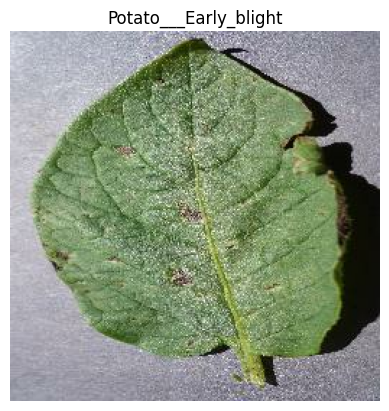

In [12]:
for image_batch, labels_batch in dataset.take(1):
    plt.imshow(image_batch[0].numpy().astype('uint8'))
    plt.title(class_names[labels_batch[0].numpy()])
    plt.axis('off')

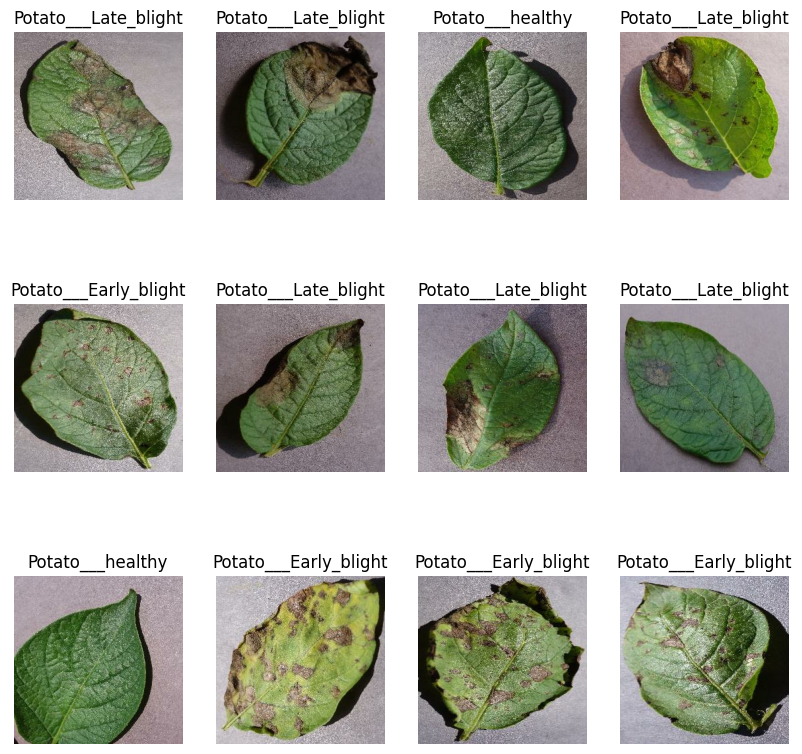

In [13]:
plt.figure(figsize = (10,10))
for image_batch, labels_batch in dataset.take(1):
    for i in range(12) : 
        ax = plt.subplot(3, 4, i + 1)
        plt.imshow(image_batch[i].numpy().astype('uint8'))
        plt.title(class_names[labels_batch[i].numpy()])
        plt.axis('off')

80% ==> training
20% ==> 10% validation, 10% test

In [14]:
train_size = 0.8
len(dataset) * 0.8 

54.400000000000006

In [15]:
train_ds = dataset.take(54)
len(train_ds)

54

In [16]:
test_ds = dataset.skip(54)
len(test_ds)

14

In [17]:
val_size = 0.1
len(dataset) * val_size 

6.800000000000001

In [18]:
val_ds = test_ds.take(6)
len(val_ds)

6

In [19]:
test_ds = test_ds.skip(6)
len(test_ds)

8

But the above is too crude , we can do it in a better way , lets create a function for it 

In [20]:
def get_dataset_partitions_tf(ds , train_split = 0.8, val_split = 0.1, test_split = 0.1, shuffle = True, shuffle_size=10000):
    if shuffle:
        ds = ds.shuffle(shuffle_size, seed=12)
    train_size = int((len(ds) * train_split))
    train_ds = ds.take(train_size)
        
    val_size  = int(len(ds) * val_split)
    val_ds = ds.skip(train_size).take(val_size)
                     
    test_ds = ds.skip(train_size).skip(val_size)
    return train_ds, val_ds , test_ds
    
    
    

In [21]:
train_ds , val_ds , test_ds = get_dataset_partitions_tf(dataset)

In [22]:
len(train_ds)

54

In [23]:
len(val_ds)

6

In [24]:
len(test_ds)

8

In [25]:
#TIME TO USE CACHE AND AUTOTUNE JUST BEFORE TRAINING 
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
val_ds = val_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
test_ds = test_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)

 <b>Building the Model</b>
 
Creating a Layer for Resizing and Normalization
Before we feed our images to network, we should be resizing it to the desired size. Moreover, to improve model performance, we should normalize the image pixel value (keeping them in range 0 and 1 by dividing by 256). This should happen while training as well as inference. Hence we can add that as a layer in our Sequential Model.

You might be thinking why do we need to resize (256,256) image to again (256,256). You are right we don't need to but this will be useful when we are done with the training and start using the model for predictions. At that time somone can supply an image that is not (256,256) and this layer will resize it

In [26]:
resize_and_rescale = tf.keras.Sequential([
  layers.Resizing(IMAGE_SIZE, IMAGE_SIZE), # Resize images to (Image_Size, Image_Size)
  layers.Rescaling(1./255),   # Rescale pixel values from [0, 255] to [0, 1]
])






<b>Data Augmentation</b>

Data Augmentation is needed when we have less data, this boosts the accuracy of our model by augmenting the data.

In [27]:
data_augmentation = tf.keras.Sequential([
  layers.RandomFlip("horizontal_and_vertical"),
  layers.RandomRotation(0.2),
])

<b>Model building </b>

In [28]:
input_shape = (BATCH_SIZE, IMAGE_SIZE, IMAGE_SIZE, CHANNELS)
n_classes = 3

model = models.Sequential([
    resize_and_rescale,
    data_augmentation,
    layers.Conv2D(32, (3,3), activation = 'relu', input_shape = input_shape),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64, (3,3), activation = 'relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64, (3,3), activation = 'relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64, (3,3), activation = 'relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64, (3,3), activation = 'relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64, (3,3), activation = 'relu'),
    layers.MaxPooling2D((2,2)),
    layers.Flatten(),
    layers.Dense(64, activation = 'relu'),
    layers.Dense(n_classes, activation = 'softmax')
])

model.build(input_shape = input_shape)

C:\Users\Hp EliteBook\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [29]:
model.summary()


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ sequential (Sequential)         │ (32, 256, 256, 3)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ sequential_1 (Sequential)       │ (32, 256, 256, 3)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d (Conv2D)                 │ (32, 254, 254, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (32, 127, 127, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (32, 125, 125, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (32, 62, 62, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (32, 60, 60, 64)       │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (32, 30, 30, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (32, 28, 28, 64)       │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (32, 14, 14, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (32, 12, 12, 64)       │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (32, 6, 6, 64)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (32, 4, 4, 64)         │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (32, 2, 2, 64)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (32, 256)              │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (32, 64)               │        16,448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (32, 3)                │           195 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 183,747 (717.76 KB)

 Trainable params: 183,747 (717.76 KB)

 Non-trainable params: 0 (0.00 B)

**Compiling the Model**

We use adam Optimizer, SparseCategoricalCrossentropy for losses, accuracy as a metric

In [30]:
model.compile(
    optimizer='adam',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
    metrics=['accuracy']
)

In [31]:
history = model.fit(
    train_ds,
    batch_size=BATCH_SIZE,
    validation_data=val_ds,
    verbose=1,
    epochs=50,
)

Epoch 1/50
54/54 ━━━━━━━━━━━━━━━━━━━━ 183s 3s/step - accuracy: 0.4521 - loss: 0.9064 - val_accuracy: 0.7135 - val_loss: 0.8796
Epoch 2/50
54/54 ━━━━━━━━━━━━━━━━━━━━ 132s 2s/step - accuracy: 0.6078 - loss: 0.7900 - val_accuracy: 0.7760 - val_loss: 0.5322
Epoch 3/50
54/54 ━━━━━━━━━━━━━━━━━━━━ 138s 3s/step - accuracy: 0.7610 - loss: 0.5413 - val_accuracy: 0.6042 - val_loss: 0.9761
Epoch 4/50
54/54 ━━━━━━━━━━━━━━━━━━━━ 177s 3s/step - accuracy: 0.7947 - loss: 0.4624 - val_accuracy: 0.8438 - val_loss: 0.3479
Epoch 5/50
54/54 ━━━━━━━━━━━━━━━━━━━━ 187s 3s/step - accuracy: 0.8994 - loss: 0.2415 - val_accuracy: 0.9062 - val_loss: 0.2844
Epoch 6/50
54/54 ━━━━━━━━━━━━━━━━━━━━ 160s 3s/step - accuracy: 0.9041 - loss: 0.2575 - val_accuracy: 0.9219 - val_loss: 0.1828
Epoch 7/50
54/54 ━━━━━━━━━━━━━━━━━━━━ 128s 2s/step - accuracy: 0.9224 - loss: 0.1964 - val_accuracy: 0.9219 - val_loss: 0.1845
Epoch 8/50
54/54 ━━━━━━━━━━━━━━━━━━━━ 126s 2s/step - accuracy: 0.9365 - loss: 0.1488 - val_accuracy: 0.9375 - v

In [36]:
scores = model.evaluate(test_ds)

8/8 ━━━━━━━━━━━━━━━━━━━━ 5s 575ms/step - accuracy: 0.9283 - loss: 0.2137


In [37]:
scores

[0.30173325538635254, 0.921875]

In [38]:
history

__Plotting the Accuracy and Loss Curves__


In [39]:
history.params

{'verbose': 1, 'epochs': 50, 'steps': 54}

In [40]:
history.history.keys()


dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])

__loss, accuracy, val loss etc are a python list containing values of loss, accuracy etc at the end of each epoch__



In [41]:
type(history.history['loss'])


list

In [42]:
len(history.history['loss'])


50

In [43]:
history.history['loss'][:5] # show loss for first 5 epochs


[0.8831230401992798,
 0.7154929637908936,
 0.4688427746295929,
 0.3624659776687622,
 0.27779534459114075]

In [44]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

In [46]:
EPOCHS=50


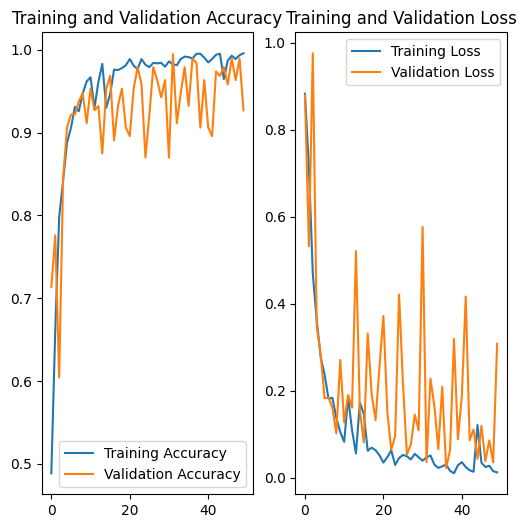

In [48]:
plt.figure(figsize=(6, 6))
plt.subplot(1, 2, 1)
plt.plot(range(EPOCHS), acc, label='Training Accuracy')
plt.plot(range(EPOCHS), val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(range(EPOCHS), loss, label='Training Loss')
plt.plot(range(EPOCHS), val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

__Run prediction on a sample image__


first image to predict
actual label: Potato___Late_blight
1/1 ━━━━━━━━━━━━━━━━━━━━ 5s 5s/step
predicted label: Potato___Late_blight


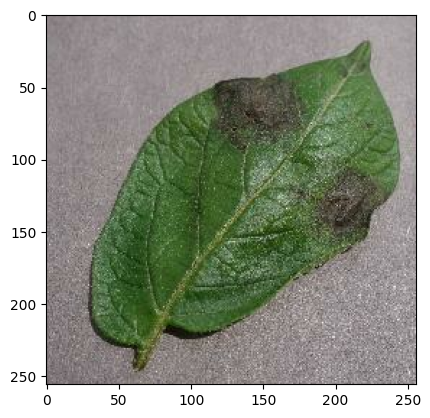

In [49]:
import numpy as np
for images_batch, labels_batch in test_ds.take(1):
    
    first_image = images_batch[0].numpy().astype('uint8')
    first_label = labels_batch[0].numpy()
    
    print("first image to predict")
    plt.imshow(first_image)
    print("actual label:",class_names[first_label])
    
    batch_prediction = model.predict(images_batch)
    print("predicted label:",class_names[np.argmax(batch_prediction[0])])

__Write a function for inference__


In [50]:
def predict(model, img):
    img_array = tf.keras.preprocessing.image.img_to_array(images[i].numpy())
    img_array = tf.expand_dims(img_array, 0)

    predictions = model.predict(img_array)

    predicted_class = class_names[np.argmax(predictions[0])]
    confidence = round(100 * (np.max(predictions[0])), 2)
    return predicted_class, confidence

__Now run inference on few sample images__

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step


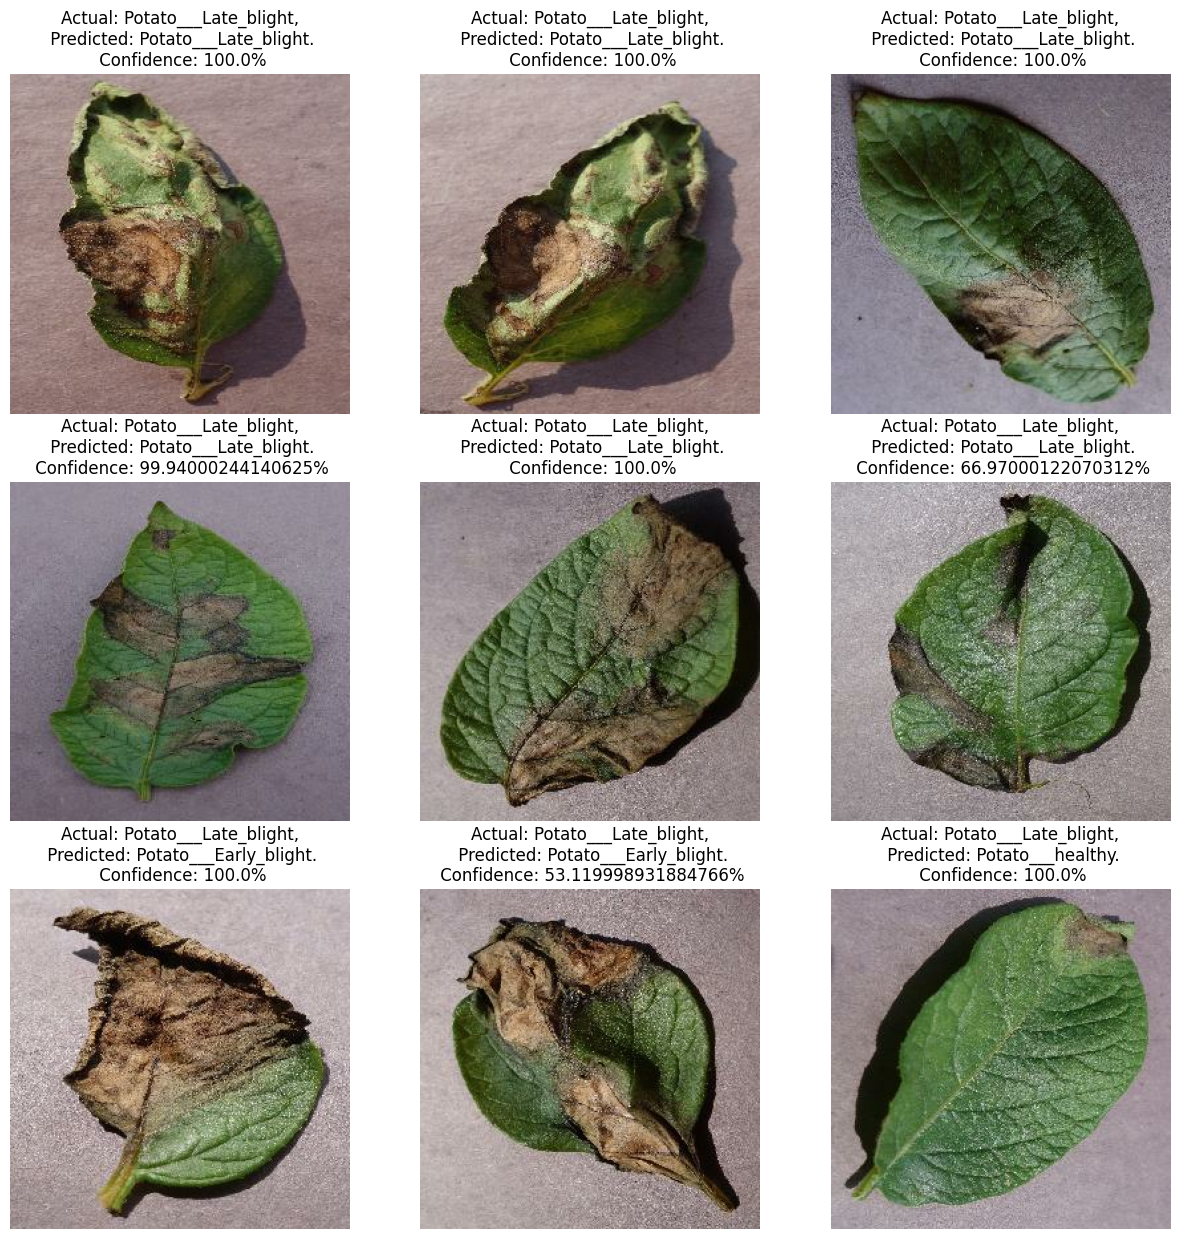

In [52]:
plt.figure(figsize=(15, 15))
for images, labels in test_ds.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        
        predicted_class, confidence = predict(model, images[i].numpy())
        actual_class = class_names[labels[i]] 
        
        plt.title(f"Actual: {actual_class},\n Predicted: {predicted_class}.\n Confidence: {confidence}%")
        
        plt.axis("off")

__Saving the model__

I first saved the model before I did other analysis 
We append the model to the list of models as a new version



In [60]:
model_version = 1
model.save(f'../models/{model_version}.keras')  # or use .h5 for HDF5 format


In [61]:
import os
model_version=max([int(i) for i in os.listdir("../models") + [0]])+1
model.save(f"../models/{model_version}.h5")

ValueError: invalid literal for int() with base 10: '1.h5'

In [33]:
model.save("../potatoes.h5")

__TENSORFLOW VERSION USED__

In [62]:
import tensorflow as tf
print(tf.__version__)


2.18.0
